In [74]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import plotly.graph_objects as go
DATA_DIR = '/Users/joycezhang/leadership/data/'
#dataset 1: restaurant facts
df_res = pd.read_csv(DATA_DIR + 'McD Restaurant Facts.csv').drop(columns=['latitude', 'longitude', 'State', 'rest_label', 'County'])

#dataset 2: weekly sales
df_sales = pd.read_csv(DATA_DIR + 'McD Weekly Sales.csv').drop(columns=['urws', 'ItemN'])
df_sales['wk_ending_dt'] = pd.to_datetime(df_sales['wk_ending'], format='%m/%d/%y')
df_sales = df_sales.drop(columns=['wk_ending'])

#dataset 3: merged
merged_df = df_res.merge(df_sales, on='REST_KEY', how='inner')
df_rev = df_sales.copy()

#dataset 4: revenue
df_rev = df_rev.dropna(subset=['wavg_price', 'totunits'])
df_rev['revenue'] = df_rev['wavg_price'] * df_rev['totunits']

In [71]:
merged_df

,REST_KEY,City,Zip,REST_PLYPL_TYP,REST_DRV_THRU_TYP,REST_TYPE,owner_label,trad_label,subtype_label,incomeq_label,...,lstage_label,ppop_09q_label,pgrowthq_label,itemdesc,wavg_price,upt,agc,adus,totunits,wk_ending_dt
0,36277,WYOMING,49519,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,...,NaN,NaN,NaN,Total All Day Breakfast Items,1.42,556.3,700.6,389.7,2728.0,2015-01-10
1,36277,WYOMING,49519,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,...,NaN,NaN,NaN,Total Breakfast Sandwich,2.25,322.8,700.6,226.1,1583.0,2015-01-10
2,36277,WYOMING,49519,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,...,NaN,NaN,NaN,Total McMuffins,1.97,184.7,700.6,129.4,906.0,2015-01-10
3,36277,WYOMING,49519,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,...,NaN,NaN,NaN,Egg McMuffin,2.99,22.4,700.6,15.7,110.0,2015-01-10
4,36277,WYOMING,49519,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,...,NaN,NaN,NaN,Sausage McMuffin,1.00,95.8,700.6,67.1,470.0,2015-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307120,36303,MOUNTWEAZEL,49685,NONE,2 BOOTH COD,FREESTANDING,LICENSEE,Y,Traditional,3-Mid Income,...,10 M3- Cautious Couples,3-Mid PPop_0_9,5-Lowest Pgrowth,Cheeseburger,0.99,102.6,1425.0,146.0,1023.0,2013-09-07
307121,36303,MOUNTWEAZEL,49685,NONE,2 BOOTH COD,FREESTANDING,LICENSEE,Y,Traditional,3-Mid Income,...,10 M3- Cautious Couples,3-Mid PPop_0_9,5-Lowest Pgrowth,Chicken Category,2.08,369.8,1425.0,527.0,3689.0,2013-09-07
307122,36303,MOUNTWEAZEL,49685,NONE,2 BOOTH COD,FREESTANDING,LICENSEE,Y,Traditional,3-Mid Income,...,10 M3- Cautious Couples,3-Mid PPop_0_9,5-Lowest Pgrowth,Total Fries,1.39,472.6,1425.0,673.0,4714.0,2013-09-07
307123,36303,MOUNTWEAZEL,49685,NONE,2 BOOTH COD,FREESTANDING,LICENSEE,Y,Traditional,3-Mid Income,...,10 M3- Cautious Couples,3-Mid PPop_0_9,5-Lowest Pgrowth,McChicken,1.00,137.0,1425.0,195.0,1367.0,2013-09-07


# Revenue overtime

Average weekly total revenue across all items: $4,164,850.69


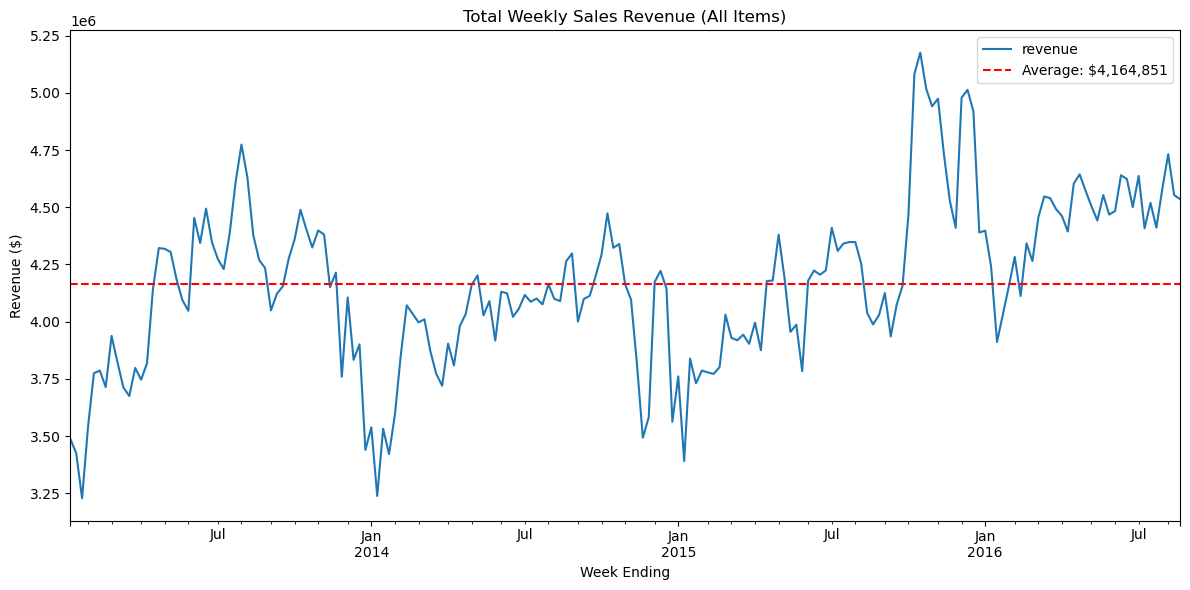

In [18]:
# Aggregate revenue by week (summing all items each week)
weekly_revenue = df_rev.groupby('wk_ending_dt')['revenue'].sum().sort_index()

# Compute average revenue (weekly) over the period
avg_revenue = weekly_revenue.mean()
print(f"Average weekly total revenue across all items: ${avg_revenue:,.2f}")

# Plot average sales revenue over time
plt.figure(figsize=(12,6))
weekly_revenue.plot()
plt.title('Total Weekly Sales Revenue (All Items)')
plt.xlabel('Week Ending')
plt.ylabel('Revenue ($)')
plt.tight_layout()

# Draw a horizontal line at the average weekly revenue on the same graph
plt.axhline(y=avg_revenue, color='r', linestyle='--', label=f'Average: ${avg_revenue:,.0f}')
plt.legend()
# plt.savefig("/Users/joycezhang/Desktop/weekly_sales_rev.png", dpi=300)
plt.show()

# AGC + Totunits

Average AGC (transactions/day) per week: 1,328.23


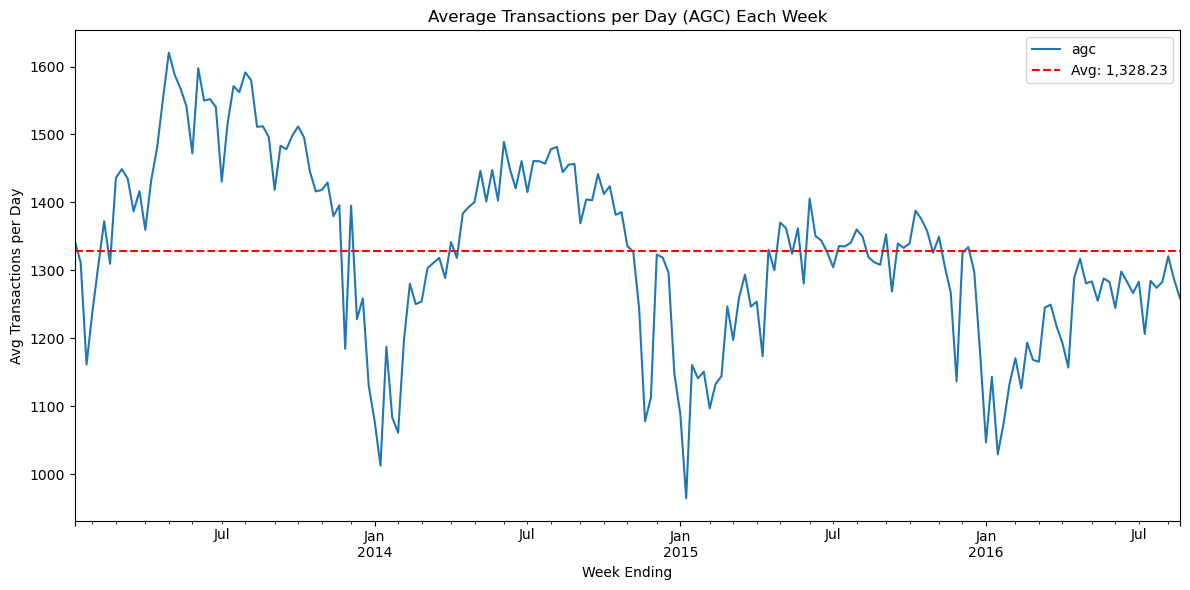

Average total units sold per week: 2,216,367


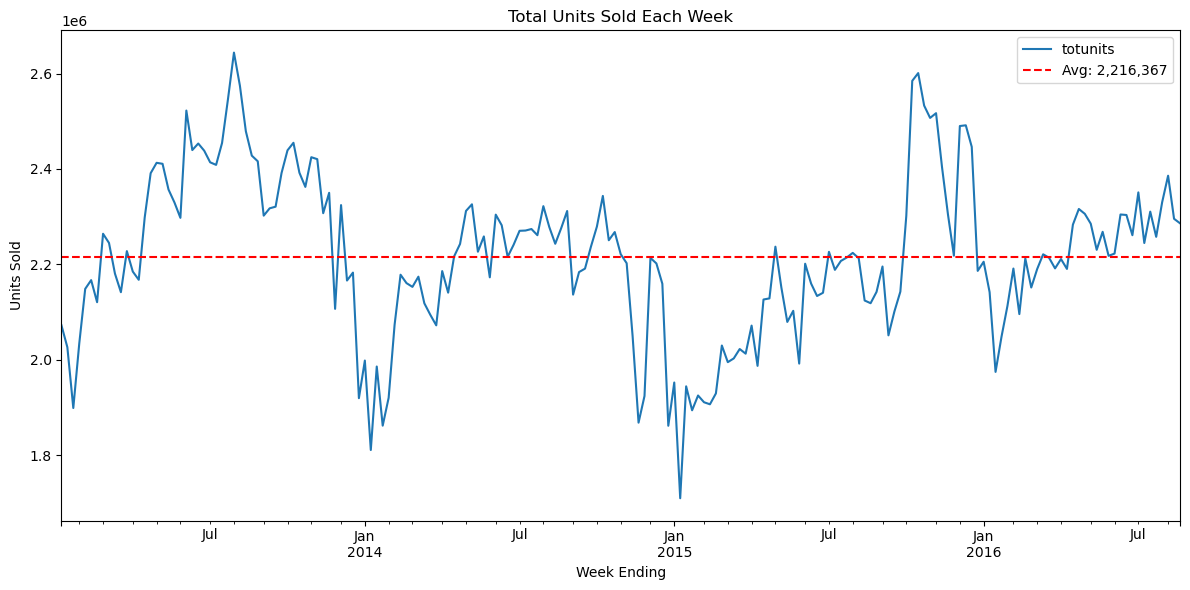

In [20]:

# AGC (Average Transactions per Day for that Week)
# First, ensure 'agc' column exists in df_rev and is aggregated weekly

# Aggregate AGC by week using mean (avg across stores/items for week)
weekly_agc = df_rev.groupby('wk_ending_dt')['agc'].mean().sort_index()
avg_weekly_agc = weekly_agc.mean()
print(f"Average AGC (transactions/day) per week: {avg_weekly_agc:,.2f}")

plt.figure(figsize=(12,6))
weekly_agc.plot()
plt.title('Average Transactions per Day (AGC) Each Week')
plt.xlabel('Week Ending')
plt.ylabel('Avg Transactions per Day')
plt.tight_layout()
plt.axhline(y=avg_weekly_agc, color='r', linestyle='--', label=f'Avg: {avg_weekly_agc:,.2f}')
plt.legend()
plt.show()


# totunits (Total Units Sold for Each Week)
weekly_totunits = df_rev.groupby('wk_ending_dt')['totunits'].sum().sort_index()
avg_weekly_totunits = weekly_totunits.mean()
print(f"Average total units sold per week: {avg_weekly_totunits:,.0f}")

plt.figure(figsize=(12,6))
weekly_totunits.plot()
plt.title('Total Units Sold Each Week')
plt.xlabel('Week Ending')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.axhline(y=avg_weekly_totunits, color='r', linestyle='--', label=f'Avg: {avg_weekly_totunits:,.0f}')
plt.legend()
plt.show()




# Totunits per Item

In [57]:
# CORRECTED: Pivot the data properly - itemdesc as index, wk_ending_dt as columns
pivot_totunits_corrected = df_sales.pivot_table(
    index='itemdesc',
    columns='wk_ending_dt',
    values='totunits'
)

# Sort the items by ending units
ending_units = pivot_totunits_corrected.loc[:, pivot_totunits_corrected.columns.max()].fillna(0)
sorted_items = ending_units.sort_values(ascending=False).index.tolist()

fig = go.Figure()

for item in sorted_items:
    fig.add_trace(go.Scatter(
        x=pivot_totunits_corrected.columns,
        y=pivot_totunits_corrected.loc[item],
        mode='lines',
        name=item,
        opacity=0.7,
        visible='legendonly'
    ))

fig.update_layout(
    title='Total Units Sold per Item Over Time',
    xaxis_title='Week Ending Date',
    yaxis_title='Total Units Sold',
    legend_title='Item Description',
    width=1200,
    height=600
)

fig.show()


 # Units/Transacton by Item

In [64]:
# Compute units per transaction for all breakfast items by lstage_label using merged_df

# Define all breakfast items (from list in cell 12 output)
all_breakfast_items = [
    'Total All Day Breakfast Items'
]

# Subset merged_df for breakfast items only
breakfast_df = merged_df[merged_df['itemdesc'].isin(all_breakfast_items)].copy()

# Add transaction data if not already present
breakfast_df['weekly_agc'] = breakfast_df['wk_ending_dt'].map(weekly_agc)
breakfast_df['units_per_transaction'] = breakfast_df['totunits'] / (breakfast_df['weekly_agc'] * 7)

# Compute weekly average units per transaction, grouped by lstage_label and item
weekly_upt_lifestage = (
    breakfast_df.groupby(['wk_ending_dt', 'lstage_label', 'itemdesc'])['units_per_transaction']
    .mean()
    .reset_index()
)

# Compute global mean UPT for each (item, lstage_label) pair for legend ranking
global_means = (
    weekly_upt_lifestage.groupby(['itemdesc', 'lstage_label'])['units_per_transaction']
    .mean()
    .sort_values(ascending=False)
)

# Build rank-ordered legend labels: list of (itemdesc, lstage_label) tuples, most to least UPT
ranked_pairs = global_means.index.tolist()

import plotly.graph_objects as go

fig = go.Figure()

# Add traces in ranked order, with ranked legend label
for item, life in ranked_pairs:
    mask = (
        (weekly_upt_lifestage['itemdesc'] == item) &
        (weekly_upt_lifestage['lstage_label'] == life)
    )
    df_subset = weekly_upt_lifestage[mask]
    if not df_subset.empty:
        fig.add_trace(
            go.Scatter(
                x=df_subset['wk_ending_dt'],
                y=df_subset['units_per_transaction'],
                mode='lines',
                name=f"{item} - {life}",
                visible='legendonly'
            )
        )

fig.update_layout(
    title='Units per Transaction - All Breakfast Items by Life Stage (Ranked Legend, Same Graph)',
    xaxis_title='Week Ending',
    yaxis_title='Avg Units per Transaction',
    legend_title='Breakfast Item - Life Stage (ranked by avg UPT)',
    width=1200,
    height=600,
)

fig.show()






In [22]:
df_sales['itemdesc'].unique()

array(['Total All Day Breakfast Items', 'Total Breakfast Sandwich',
       'Total McMuffins', 'Egg McMuffin', 'Sausage McMuffin',
       'Sausage Egg McMuffin', 'Total Biscuits', 'Bac Egg Ch Biscuit',
       'Sausage Biscuit', 'Sausage Egg Biscuit', 'Hashbrown',
       'Total McGriddles', 'Bac Egg Ch McGriddle', 'Sau Egg Ch McGriddle',
       'Total Bagels', 'Beef Category', 'Large Burgers', 'Big Mac',
       'Core QP and QPC', 'Hamburger', 'Cheeseburger', 'Chicken Category',
       'Total Fries', 'McChicken', 'McDouble'], dtype=object)

# Rev by Item

In [19]:
# Pivot table: item revenue per week using df_rev (which already has correct 'revenue' column)
pivot_revenue_table = df_rev.pivot_table(
    index='itemdesc',
    columns='wk_ending_dt',
    values='revenue'
)

# Sort items by total revenue at the most recent week available
ending_revenue = pivot_revenue_table.loc[:, pivot_revenue_table.columns.max()].fillna(0)
sorted_revenue_items = ending_revenue.sort_values(ascending=False).index.tolist()

fig_revenue = go.Figure()

for item in sorted_revenue_items:
    fig_revenue.add_trace(go.Scatter(
        x=pivot_revenue_table.columns,
        y=pivot_revenue_table.loc[item],
        mode='lines',
        name=item,
        opacity=0.7,
        visible='legendonly'
    ))

fig_revenue.update_layout(
    title='Item Revenue per Week Over Time',
    xaxis_title='Week Ending Date',
    yaxis_title='Revenue ($)',
    legend_title='Item Description',
    width=1200,
    height=600
)

fig_revenue.show()

# fig_revenue.write_html("mcd_revenue_interactive.html")
# print("Saved as HTML: mcd_revenue_interactive.html")




# AGC per X

## Per city

In [52]:
# Calculate and plot average agc per city over time (by week)

# Group by both city and week ending date to compute the mean agc
avg_agc_city_week = merged_df.groupby(['City', 'wk_ending_dt'])['agc'].mean().reset_index()

# Create a pivot table: rows=week, columns=city, values=average agc
pivot_avg_agc = avg_agc_city_week.pivot(index='wk_ending_dt', columns='City', values='agc')

# Optionally sort cities by their latest average agc
latest_avg = pivot_avg_agc.loc[pivot_avg_agc.index.max()].sort_values(ascending=False)
sorted_cities = latest_avg.index.tolist()

import plotly.graph_objects as go

fig_agc = go.Figure()

for city in sorted_cities:
    fig_agc.add_trace(go.Scatter(
        x=pivot_avg_agc.index,
        y=pivot_avg_agc[city],
        mode='lines',
        name=city,
        opacity=0.7,
        visible='legendonly'
    ))

fig_agc.update_layout(
    title='Average AGC per City Over Time',
    xaxis_title='Week Ending Date',
    yaxis_title='Average AGC',
    legend_title='City',
    width=1200,
    height=600
)

fig_agc.show()



In [89]:
# # Select rows for City == 'HOLLAND' and itemdesc == 'Total All Day Breakfast Items'
# holland_breakfast = merged_df[
#     (merged_df['City'] == 'HOLLAND') & (merged_df['itemdesc'] == 'Total All Day Breakfast Items')
# ]

# Group by week ending date and itemdesc, then calculate the average totunits for each item per week in HOLLAND
holland_all = merged_df[merged_df['City'] == 'HOLLAND']
weekly_avg_totunits_items = (
    holland_all.groupby(['wk_ending_dt', 'itemdesc'])['totunits']
    .mean()
    .reset_index()
)

import plotly.graph_objects as go

# Sort legend by overall average totunits descending
item_order = (
    weekly_avg_totunits_items.groupby('itemdesc')['totunits']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

fig = go.Figure()

for item in item_order:
    item_data = weekly_avg_totunits_items[weekly_avg_totunits_items['itemdesc'] == item]
    fig.add_trace(
        go.Scatter(
            x=item_data['wk_ending_dt'],
            y=item_data['totunits'],
            mode='lines',
            name=item,
            opacity=0.8,
            visible='legendonly'
        )
    )

# Optionally, make the top 5 most popular items visible by default
for i in range(min(5, len(item_order))):
    fig.data[i].visible = True

fig.update_layout(
    title="HOLLAND: Average totunits per Week for Each Item (Interactive)",
    xaxis_title='Week Ending Date',
    yaxis_title='Average totunits',
    width=1200,
    height=600,
    legend_title='itemdesc',
    legend=dict(traceorder='normal', yanchor="top", y=1, xanchor="left", x=1.01)
)

fig.show()





In [91]:
# Repeat the same plot as above, but filter for "CEDAR SPRINGS" city

# Sort legend by overall average totunits descending for CEDAR SPRINGS
cedar_springs_df = merged_df[merged_df['City'] == 'CEDAR SPRINGS']

cedar_weekly_avg_totunits_items = (
    cedar_springs_df
    .groupby(['wk_ending_dt', 'itemdesc'])['totunits']
    .mean()
    .reset_index()
)

cedar_item_order = (
    cedar_weekly_avg_totunits_items.groupby('itemdesc')['totunits']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

cedar_fig = go.Figure()

for item in cedar_item_order:
    item_data = cedar_weekly_avg_totunits_items[cedar_weekly_avg_totunits_items['itemdesc'] == item]
    cedar_fig.add_trace(
        go.Scatter(
            x=item_data['wk_ending_dt'],
            y=item_data['totunits'],
            mode='lines',
            name=item,
            opacity=0.8,
            visible='legendonly'
        )
    )

# Show top 5 items by default
for i in range(min(5, len(cedar_item_order))):
    cedar_fig.data[i].visible = True

cedar_fig.update_layout(
    title="CEDAR SPRINGS: Average totunits per Week for Each Item (Interactive)",
    xaxis_title='Week Ending Date',
    yaxis_title='Average totunits',
    width=1200,
    height=600,
    legend_title='itemdesc',
    legend=dict(traceorder='normal', yanchor="top", y=1, xanchor="left", x=1.01)
)

cedar_fig.show()


In [94]:
# Define the list of cities to compare
cities_to_plot = [
    'CEDAR SPRINGS', 'HOLLAND', 'GRAND HAVEN', 'ZEELAND', 'HUDSONVILLE',
    'GRAND RAPIDS', 'GALESBURG', 'COOPERSVILLE', 'SCHOOLCRAFT', 'LOWELL'
]

# Define the item descriptions to plot
main_items = [
    'Beef Category',
    'Total Fries',
    'Chicken Category'
    # plus all items containing 'breakfast sandwich'
]

# Get all unique itemdesc for "breakfast sandwich" across all cities for global color mapping
bfast_mask_all = merged_df['itemdesc'].str.lower().str.contains('breakfast sandwich')
all_breakfast_items = sorted(merged_df.loc[bfast_mask_all, 'itemdesc'].unique())

# Full global consistent order
all_items_order = main_items + all_breakfast_items

# Set a color palette (Plotly's "Set2" or "Set3" palettes handle 4-8 lines well, feel free to expand if >8)
import plotly.colors
palette = plotly.colors.qualitative.Set2
# Expand palette if not enough colors
while len(palette) < len(all_items_order):
    palette = palette + palette
item_color_map = {item: palette[i] for i, item in enumerate(all_items_order)}

from plotly.subplots import make_subplots

city_fig = make_subplots(
    rows=5, cols=2,
    subplot_titles=cities_to_plot,
    shared_xaxes=False,
    shared_yaxes=False,
    horizontal_spacing=0.08,
    vertical_spacing=0.10
)

for idx, city in enumerate(cities_to_plot):
    city_df = merged_df[merged_df['City'] == city]

    # City-specific which breakfast sandwich items are present
    city_bfast_mask = city_df['itemdesc'].str.lower().str.contains('breakfast sandwich')
    city_breakfast_items = sorted(city_df.loc[city_bfast_mask, 'itemdesc'].unique())
    items_current_city = main_items + list(city_breakfast_items)

    city_weekly_avg = (
        city_df[city_df['itemdesc'].isin(items_current_city)]
        .groupby(['wk_ending_dt', 'itemdesc'])['totunits']
        .mean()
        .reset_index()
    )

    row = idx // 2 + 1
    col = idx % 2 + 1

    for item in all_items_order:   # Always iterate global order for consistent color
        item_data = city_weekly_avg[city_weekly_avg['itemdesc'] == item]
        if not item_data.empty:
            city_fig.add_trace(
                go.Scatter(
                    x=item_data['wk_ending_dt'],
                    y=item_data['totunits'],
                    mode='lines',
                    name=item,
                    opacity=0.85,
                    line=dict(color=item_color_map[item]),
                    showlegend=(idx == 0),  # Show legend only for the first graph, off elsewhere
                ),
                row=row, col=col
            )

city_fig.update_layout(
    height=2500, width=1400,
    title_text="Average totunits per Week for Selected Items (Beef, Fries, Chicken, Breakfast Sandwich) - By City",
    showlegend=True,
    legend_title_text='itemdesc'
)
# Only want to show legend on first subplot
for i, trace in enumerate(city_fig['data']):
    if not city_fig['data'][i]['showlegend']:
        city_fig['data'][i]['showlegend'] = False

city_fig.update_xaxes(title_text="Week Ending Date", tickformat="%Y-%m")
city_fig.update_yaxes(title_text="Avg totunits")

city_fig.show()




In [95]:
# Calculate % increase in average totunits for 'Total All Day Breakfast Items' 
# and 'Total Breakfast Sandwich' sold in 2016 vs. 2015 and prior (annual avg)
# for each city.

from datetime import datetime

promo_items = [
    'Total All Day Breakfast Items',
    'Total Breakfast Sandwich'
]

# Ensure wk_ending_dt is datetime
merged_df['wk_ending_dt'] = pd.to_datetime(merged_df['wk_ending_dt'])

# Add Year column
merged_df['Year'] = merged_df['wk_ending_dt'].dt.year

results = []

for item in promo_items:
    item_df = merged_df[merged_df['itemdesc'] == item].copy()
    # All years before 2016: treat as "pre" period
    pre_df = item_df[item_df['Year'] < 2016]
    post_df = item_df[item_df['Year'] == 2016]

    pre_avg = pre_df.groupby('City')['totunits'].mean()
    post_avg = post_df.groupby('City')['totunits'].mean()

    pct_increase = ((post_avg - pre_avg) / pre_avg) * 100
    pct_increase = pct_increase.dropna().sort_values(ascending=False)
    top_cities = pct_increase.head(10)

    print(f"\nTop 10 cities by % increase in avg totunits for '{item}' after All Day Breakfast (2016 vs. prior):")
    print(top_cities)
    results.append((item, pct_increase))

# Optionally: collect as DataFrame for further use
cities_pct_increase_df = pd.concat(
    [pct.rename(item) for item, pct in results], axis=1
)
cities_pct_increase_df.columns = promo_items
print("\nPercent increase in avg totunits (2016 vs pre-2016) by City:")
print(cities_pct_increase_df.sort_values(by='Total All Day Breakfast Items', ascending=False).head(10))



Top 10 cities by % increase in avg totunits for 'Total All Day Breakfast Items' after All Day Breakfast (2016 vs. prior):
City
ROCKFORD         26.237915
SPARTA           23.338118
GALESBURG        21.772224
ZEELAND          18.740268
ALLENDALE        17.544456
GRAND HAVEN      17.113935
SPRING LAKE      16.559430
JENISON          16.159385
PORTAGE          15.940844
CEDAR SPRINGS    15.192195
Name: totunits, dtype: float64

Top 10 cities by % increase in avg totunits for 'Total Breakfast Sandwich' after All Day Breakfast (2016 vs. prior):
City
ROCKFORD         20.597850
GALESBURG        18.670395
ZEELAND          15.239959
CEDAR SPRINGS    15.231095
PORTAGE          15.030353
SPARTA           14.801313
HUDSONVILLE      12.591083
SCHOOLCRAFT      11.724704
SPRING LAKE      11.714146
GRAND HAVEN      11.683869
Name: totunits, dtype: float64

Percent increase in avg totunits (2016 vs pre-2016) by City:
               Total All Day Breakfast Items  Total Breakfast Sandwich
City          

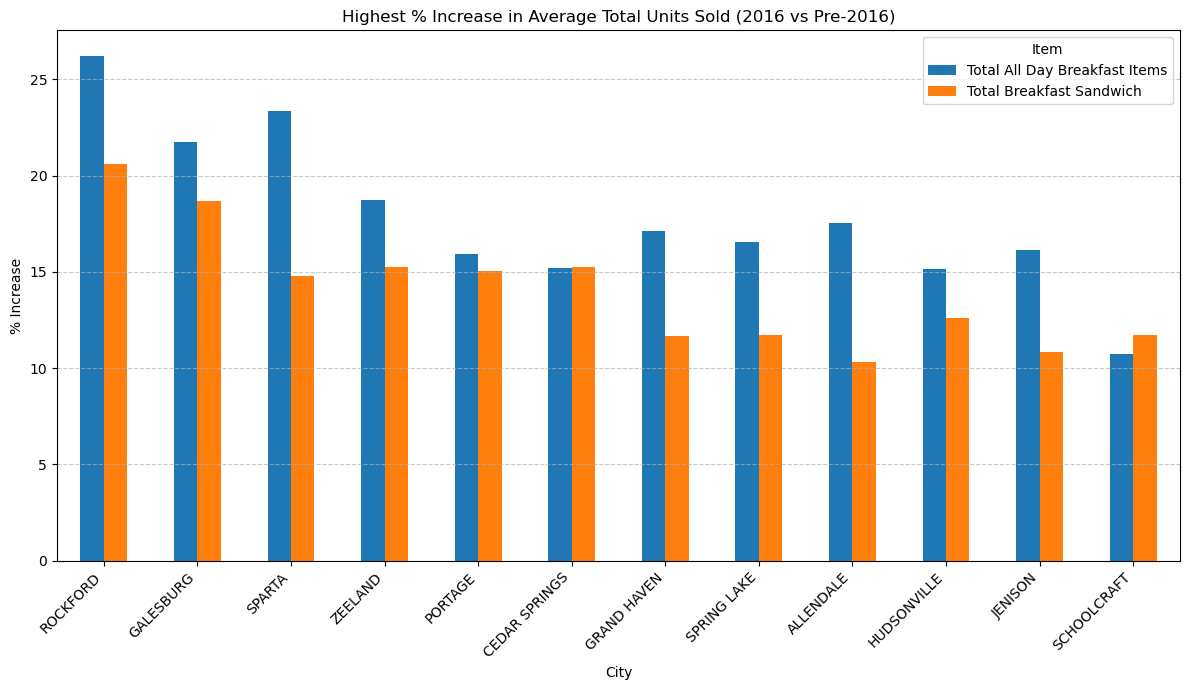

In [101]:
# Combined bar chart of percent increase for both breakfast items, sorted by total percent increase

import matplotlib.pyplot as plt

# Get cities appearing in the top 10 for either item
top_cities_all = set(
    cities_pct_increase_df['Total All Day Breakfast Items'].sort_values(ascending=False).head(10).index
).union(
    cities_pct_increase_df['Total Breakfast Sandwich'].sort_values(ascending=False).head(10).index
)
top_cities_all = list(top_cities_all)
df_top = cities_pct_increase_df.loc[top_cities_all]

# Sort by total percent increase (sum across both items, descending)
df_top_sorted = df_top.assign(total_increase=df_top.sum(axis=1)).sort_values('total_increase', ascending=False).drop(columns='total_increase')

ax = df_top_sorted.plot(
    kind='bar',
    figsize=(12, 7)
)
plt.title('Highest % Increase in Average Total Units Sold (2016 vs Pre-2016)')
plt.ylabel('% Increase')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Item')
plt.tight_layout()
plt.savefig('highest_pct_increase_by_city.png', dpi=300)
plt.show()




In [84]:
# Calculate average totunits for 'Total All Day Breakfast Items' per city
breakfast_city = (
    merged_df[merged_df['itemdesc'] == 'Total All Day Breakfast Items']
    .groupby('City')['totunits']
    .mean()
    .sort_values(ascending=False)
)

print("Cities with highest avg 'Total All Day Breakfast Items' totunits purchased:")
print(breakfast_city.head(10))


Cities with highest avg 'Total All Day Breakfast Items' totunits purchased:
City
CEDAR SPRINGS    8952.576720
HOLLAND          8181.432675
GRAND HAVEN      6879.465608
ZEELAND          6211.105820
HUDSONVILLE      6150.603175
GRAND RAPIDS     6134.093795
GALESBURG        6066.804233
COOPERSVILLE     6011.000000
SCHOOLCRAFT      5933.158730
LOWELL           5916.873016
Name: totunits, dtype: float64


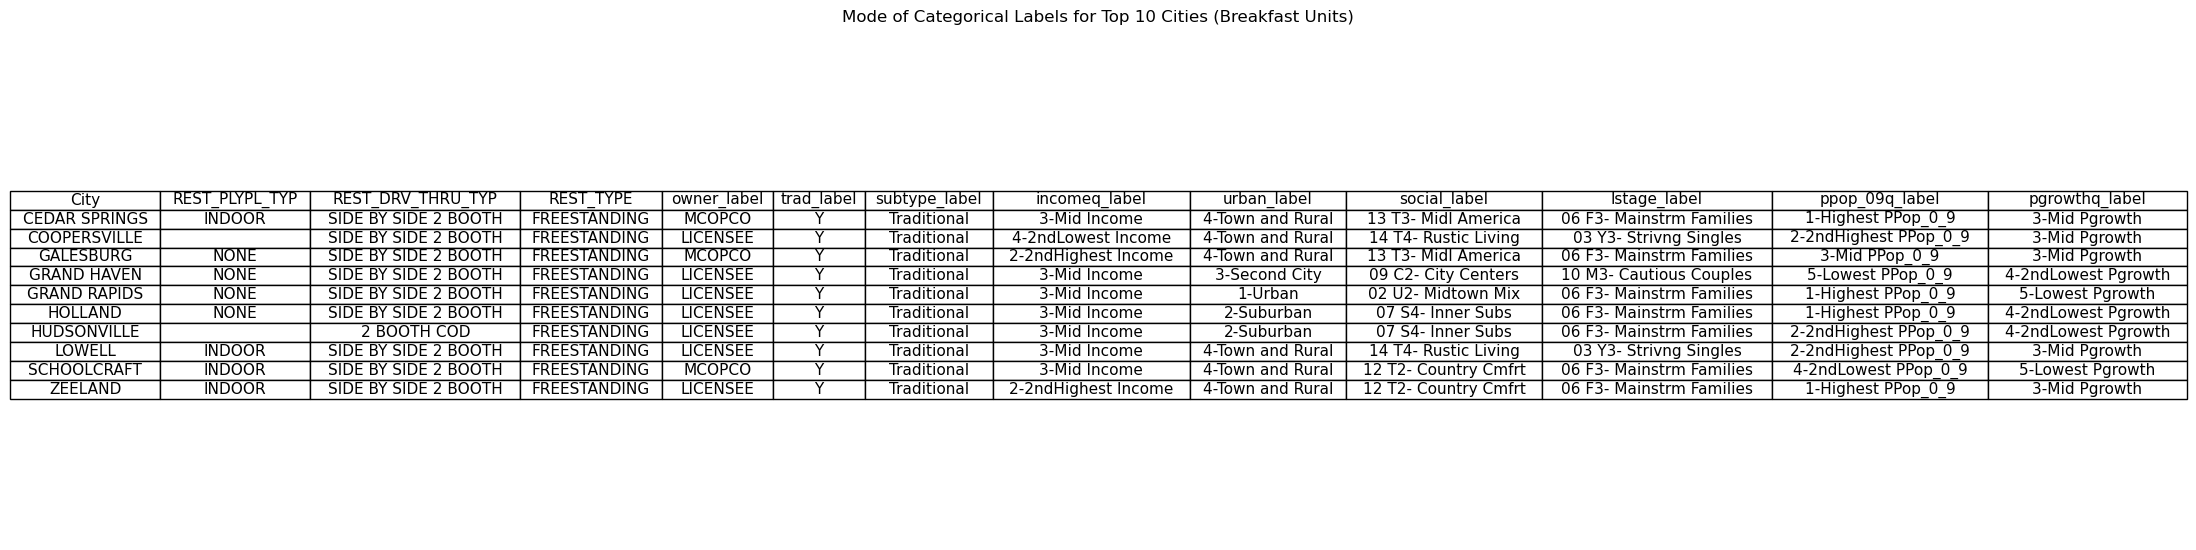

In [106]:
# Filter df_res for the ten cities with highest avg 'Total All Day Breakfast Items' totunits purchased
top10_breakfast_cities = breakfast_city.head(10).index.tolist()
df_res_top10 = df_res[df_res['City'].isin(top10_breakfast_cities)]
df_res_top10
# Drop REST_KEY and Zip columns, then group by City and get the mode for each other categorical label
categorical_cols = [
    col for col in df_res_top10.select_dtypes(include=['object', 'category']).columns
    if col not in ['City', 'REST_KEY', 'Zip']
]
# Make a copy so we can drop columns without modifying df_res_top10 itself
mode_by_city = (
    df_res_top10.drop(columns=['REST_KEY', 'Zip'])
    .groupby('City')[categorical_cols]
    .agg(lambda x: x.mode(dropna=True).iloc[0] if not x.mode(dropna=True).empty else None)
    .reset_index()
)

# Display as a static table visual using matplotlib
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(min(2 + 2*mode_by_city.shape[1], 18), 0.6 + 0.5*mode_by_city.shape[0]))
ax.axis('off')
tbl = ax.table(
    cellText=mode_by_city.values,
    colLabels=mode_by_city.columns,
    cellLoc='center',
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.auto_set_column_width(col=list(range(len(mode_by_city.columns))))
plt.title("Mode of Categorical Labels for Top 10 Cities (Breakfast Units)", pad=20)
plt.tight_layout()
plt.savefig('mode_by_city.png', dpi=300)
plt.show()




## Per income/social/urban

In [47]:
# Calculate average agc for each income level overall
avg_agc_income = merged_df.groupby('incomeq_label')['agc'].mean().reset_index()

# Plot average agc by income level
import plotly.express as px

# fig_income_agc = px.bar(
#     avg_agc_income,
#     x='incomeq_label',
#     y='agc',
#     title='Average AGC by Income Level',
#     labels={'agc': 'Average AGC', 'incomeq_label': 'Income Level'},
#     color='incomeq_label',
#     width=800,
#     height=500
# )
# fig_income_agc.update_layout(showlegend=False)
# fig_income_agc.show()

# Calculate and plot average agc for each income level over time (by week)
avg_agc_income_week = merged_df.groupby(['incomeq_label', 'wk_ending_dt'])['agc'].mean().reset_index()

fig_income_agc_time = px.line(
    avg_agc_income_week,
    x='wk_ending_dt',
    y='agc',
    color='incomeq_label',
    title='Average AGC per Income Level Over Time',
    labels={'wk_ending_dt': 'Week Ending Date', 'agc': 'Average AGC', 'incomeq_label': 'Income Level'},
    width=1200,
    height=600
)
fig_income_agc_time.show()

In [53]:
# Calculate total AGC (transactions) per urban segment to determine order
urban_order = (
    merged_df.groupby('urban_label')['agc']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Calculate and plot average agc for each urban segment over time (by week)
avg_agc_urban_week = merged_df.groupby(['urban_label', 'wk_ending_dt'])['agc'].mean().reset_index()

fig_urban_agc_time = px.line(
    avg_agc_urban_week,
    x='wk_ending_dt',
    y='agc',
    color='urban_label',
    category_orders={'urban_label': urban_order},
    title='Average AGC per Urban Segment Over Time',
    labels={'wk_ending_dt': 'Week Ending Date', 'agc': 'Average AGC', 'urban_label': 'Urban Segment'},
    width=1200,
    height=600
)
fig_urban_agc_time.update_layout(legend_title='Urban Segment', legend_traceorder="normal")
fig_urban_agc_time.show()


In [51]:
# Calculate total AGC (transactions) per social segment to determine order
social_order = (
    merged_df.groupby('social_label')['agc']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Calculate and plot average agc for each social segment over time (by week)
avg_agc_social_week = merged_df.groupby(['social_label', 'wk_ending_dt'])['agc'].mean().reset_index()

fig_social_agc_time = px.line(
    avg_agc_social_week,
    x='wk_ending_dt',
    y='agc',
    color='social_label',
    category_orders={'social_label': social_order},
    title='Average AGC per Social Segment Over Time',
    labels={'wk_ending_dt': 'Week Ending Date', 'agc': 'Average AGC', 'social_label': 'Social Segment'},
    width=1200,
    height=600
)
fig_social_agc_time.update_layout(legend_title='Social Segment', legend_traceorder="normal")
fig_social_agc_time.show()


## Per Lifestage*

In [50]:
# Calculate total AGC (transactions) per life stage to determine order
lstage_order = (
    merged_df.groupby('lstage_label')['agc']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Calculate and plot average agc for each life stage segment over time (by week)
avg_agc_lstage_week = merged_df.groupby(['lstage_label', 'wk_ending_dt'])['agc'].mean().reset_index()

fig_lstage_agc_time = px.line(
    avg_agc_lstage_week,
    x='wk_ending_dt',
    y='agc',
    color='lstage_label',
    category_orders={'lstage_label': lstage_order},
    title='Average AGC per Life Stage Segment Over Time',
    labels={'wk_ending_dt': 'Week Ending Date', 'agc': 'Average AGC', 'lstage_label': 'Life Stage Segment'},
    width=1200,
    height=600
)
fig_lstage_agc_time.update_layout(legend_title='Life Stage Segment', legend_traceorder="normal")
fig_lstage_agc_time.show()



Young accumulators?? 

In [56]:
# Graph: "Total All Day Breakfast Items" Total Units Sold (totunits), All Life Stages on One Plot, interactive with Plotly
import plotly.graph_objects as go

# Compute average totunits by life stage label for 'Total All Day Breakfast Items'
avg_totunits_by_lstage = (
    merged_df[merged_df['itemdesc'] == "Total All Day Breakfast Items"]
    .groupby('lstage_label')['totunits']
    .mean()
    .sort_values(ascending=False)
)

fig = go.Figure()

for lstage in avg_totunits_by_lstage.index:
    if pd.notna(lstage):
        subset = merged_df[
            (merged_df['lstage_label'] == lstage) &
            (merged_df['itemdesc'] == "Total All Day Breakfast Items")
        ]
        group_data = (
            subset.groupby("wk_ending_dt")["totunits"]
            .mean()
            .sort_index()
        )
        if not group_data.empty:
            fig.add_trace(go.Scatter(
                x=pd.to_datetime(group_data.index),
                y=group_data.values,
                mode='lines',
                name=lstage,
                visible='legendonly'  # Start with all traces off
            ))

# Make the top-ranked (highest avg totunits) life stage visible by default
if len(fig.data) > 0:
    fig.data[0].visible = True

fig.update_layout(
    title="Weekly Avg Units Sold (totunits)<br>Total All Day Breakfast Items: By Life Stage",
    xaxis_title="Week Ending Date",
    yaxis_title="Average Units Sold (Total All Day Breakfast Items)",
    width=1400,
    height=800,
    legend_title="Life Stage"
)
fig.show()
# 1st Figure: Rank legend entries by overall avg UPT for each lstage (Total All Day Breakfast Items)
fig.write_html("total_all_day_breakfast_by_lifestage.html")


Is there a longer lasting effect of the promotion with young accumulators? 

# Percent AGC

In [77]:
# Ensure 'wk_ending_dt' is datetime
merged_df['wk_ending_dt'] = pd.to_datetime(merged_df['wk_ending_dt'])

# Create a column for year and month for monthly grouping
merged_df['year_month'] = merged_df['wk_ending_dt'].dt.to_period('M')

# Group by week and month, summing weekly agc (across all restaurants, if relevant)
weekly_agc = merged_df.groupby(['year_month', 'wk_ending_dt'])['agc'].sum().reset_index()

# For each month, calculate the average weekly agc (sum over weeks divided by number of weeks in that month)
monthly_avg_agc = weekly_agc.groupby('year_month')['agc'].mean().reset_index()
monthly_avg_agc['year_month'] = monthly_avg_agc['year_month'].astype(str)

# Calculate agc_perc as current month's average divided by previous month's average
monthly_avg_agc['agc_perc'] = monthly_avg_agc['agc'] / monthly_avg_agc['agc'].shift(1)

# Display result
print(monthly_avg_agc)




   year_month           agc  agc_perc
0     2013-01  1.993731e+06       NaN
1     2013-02  2.048355e+06  1.027398
2     2013-03  2.232683e+06  1.089989
3     2013-04  2.253985e+06  1.009541
4     2013-05  2.425063e+06  1.075900
5     2013-06  2.393885e+06  0.987144
6     2013-07  2.382051e+06  0.995056
7     2013-08  2.432899e+06  1.021346
8     2013-09  2.339672e+06  0.961681
9     2013-10  2.336005e+06  0.998432
10    2013-11  2.167748e+06  0.927972
11    2013-12  1.995349e+06  0.920471
12    2014-01  1.736551e+06  0.870299
13    2014-02  1.906576e+06  1.097910
14    2014-03  2.062048e+06  1.081545
15    2014-04  2.163916e+06  1.049401
16    2014-05  2.260403e+06  1.044589
17    2014-06  2.316561e+06  1.024845
18    2014-07  2.333386e+06  1.007263
19    2014-08  2.366373e+06  1.014137
20    2014-09  2.271440e+06  0.959882
21    2014-10  2.265542e+06  0.997404
22    2014-11  1.972218e+06  0.870528
23    2014-12  2.056202e+06  1.042583
24    2015-01  1.781077e+06  0.866197
25    2015-0

In [80]:
# Find which cities are sustaining families (i.e., have Life Stage 'Sustaining Families')

# Filter for life stage 'Sustaining Families'
sf_df = merged_df[merged_df['lstage_label'] == '07 F4- Sustaing Families']

# Find unique cities (if you want counts, can .value_counts() instead)
sustaining_cities = sf_df['City'].unique()

print("Cities with Sustaining Families life stage present:")
print(sustaining_cities)


Cities with Sustaining Families life stage present:
['GRAND RAPIDS']


In [ ]:
merged_df['lstage_label'].value_counts()


lstage_label
03 Y3- Strivng Singles      85050
06 F3- Mainstrm Families    85050
10 M3- Cautious Couples     61425
02 Y2- Young Achievrs       28350
01 Y1- Midlif Success       14175
05 F2- Yng Accumulatrs       9450
04 F1- Accumultd Wealth      4725
11 M4- Sustaing Seniors      4725
07 F4- Sustaing Families     4725
Name: count, dtype: int64